In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
nfdata = pd.read_csv('subscribers_data.csv')
nfdata

,Time Period,Subscribers
0,01/04/2013,34240000
1,01/07/2013,35640000
2,01/10/2013,38010000
3,01/01/2014,41430000
4,01/04/2014,46130000
5,01/07/2014,47990000
6,01/10/2014,50650000
7,01/01/2015,54480000
8,01/04/2015,59620000
9,01/07/2015,62080000


The dataset contains subscription counts of Netflix at start  from 2013 to 2023 of each quarter

Below we convert Time period to datetime format

In [3]:
nfdata['Time Period'] = pd.to_datetime(nfdata['Time Period'], format = '%d/%m/%Y')
print(nfdata)

   Time Period  Subscribers
0   2013-04-01     34240000
1   2013-07-01     35640000
2   2013-10-01     38010000
3   2014-01-01     41430000
4   2014-04-01     46130000
5   2014-07-01     47990000
6   2014-10-01     50650000
7   2015-01-01     54480000
8   2015-04-01     59620000
9   2015-07-01     62080000
10  2015-10-01     66020000
11  2016-01-01     70840000
12  2016-04-01     77710000
13  2016-07-01     79900000
14  2016-10-01     83280000
15  2017-01-01     89090000
16  2017-04-01     94360000
17  2017-07-01     99040000
18  2017-10-01    104020000
19  2018-01-01    110640000
20  2018-04-01    118900000
21  2018-07-01    124350000
22  2018-10-01    130420000
23  2019-01-01    139260000
24  2019-04-01    148860000
25  2019-07-01    151560000
26  2019-10-01    158330000
27  2020-01-01    167090000
28  2020-04-01    182860000
29  2020-07-01    192950000
30  2020-10-01    195150000
31  2021-01-01    203660000
32  2021-04-01    207640000
33  2021-07-01    209180000
34  2021-10-01    21

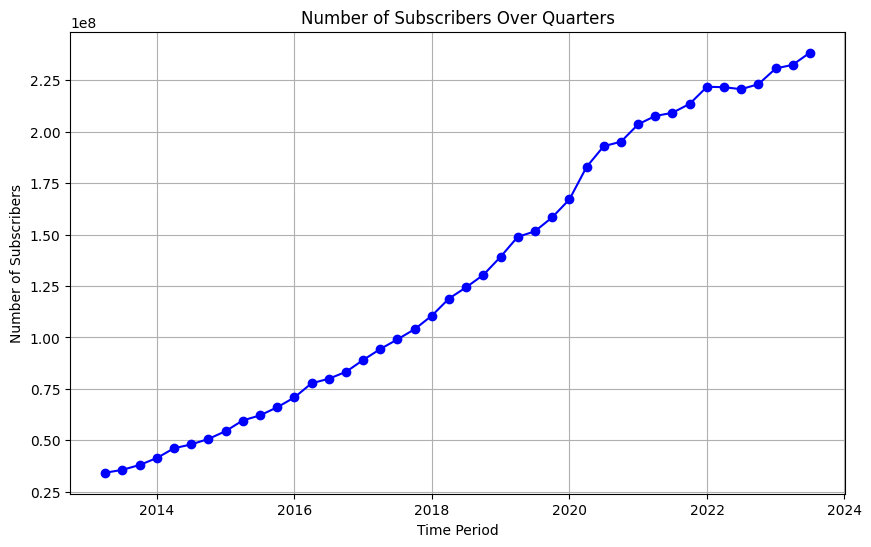

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(nfdata['Time Period'], nfdata['Subscribers'], marker='o', linestyle='-', color='b')
plt.title('Number of Subscribers Over Quarters')
plt.xlabel('Time Period')
plt.ylabel('Number of Subscribers')
plt.grid(True)
plt.show()

In [5]:
nfdata['Quaterly Growth Rate'] = nfdata['Subscribers'].pct_change()*100

nfdata['Bar Colour'] = nfdata['Quaterly Growth Rate'].apply(lambda x: 'green' if x>0 else 'red')

fig = go.Figure()
fig.add_trace(go.Bar(x = nfdata['Time Period'], y = nfdata['Quaterly Growth Rate'], marker_color = nfdata['Bar Colour'],
                     name = 'Quarterly Growth Rate'))

fig.update_layout(title = 'Netflix Quarterly Subscriptions Growth Rate',
                  xaxis_title = 'Time Period',
                  yaxis_title = 'Quarterly Growth Rate (%)')

fig.show()

In [6]:
# Calculating yearly growth Rate

nfdata['Year'] = nfdata['Time Period'].dt.year
yearly_growth_rate = nfdata.groupby('Year')['Subscribers'].pct_change().fillna(0) * 100

# creating new column for bar color (green for positive growth and red for
# negative)

nfdata['Bar Colour'] = yearly_growth_rate.apply(lambda x: 'green' if x> 0 else 'red')

#Plot the yearly subscriber growth rate using bar graphs

fig = go.Figure()
fig.add_trace(go.Bar(
    x = nfdata['Year'],
    y = yearly_growth_rate,
    marker_color = nfdata['Bar Colour'],
    name = 'Yearly Growth Rate'))

fig.update_layout(title = 'Netflix Yearly Subscriber Growth Rate',
                  xaxis_title = 'Year',
                  yaxis_title = 'Yearly Growth Rate (%)')

fig.show()

In [7]:
# For using ARIMA

# Converting data into time series format

time_series = nfdata.set_index('Time Period')['Subscribers']

<function matplotlib.pyplot.show(close=None, block=None)>

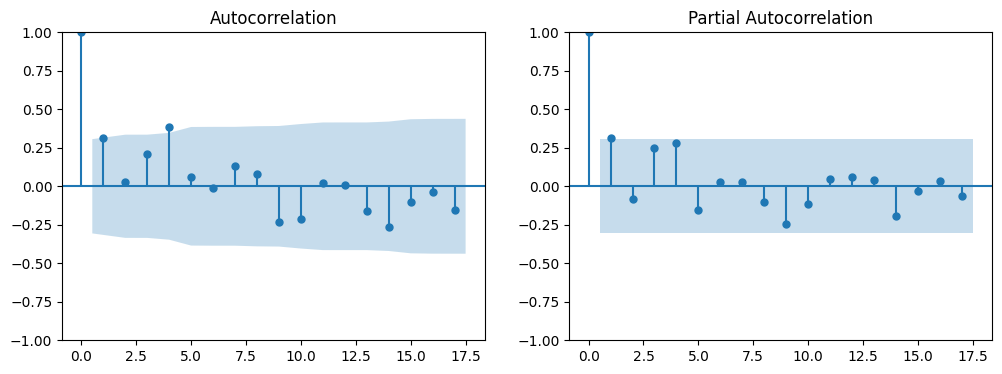

In [8]:
differenced_series = time_series.diff().dropna()

fig, axes = plt.subplots(1,2, figsize = (12,4))
plot_acf(differenced_series, ax = axes[0])
plot_pacf(differenced_series, ax = axes[1])
plt.show

Here we first calculated the differenced time series from the original time_series, removed any NaN values resulting from the differencing, and then plotted the ACF and PACF to provide insights into the potential order of the AR and MA components in the time series. These plots are useful for determining the appropriate parameters when using the ARIMA model for time series forecasting.

Based on the plots, we find that p=1 and q=1. The ACF plot cuts off at lag 1, indicating q=1, and the PACF plot also cuts off at lag 1, indicating p=1. As there is a linear trend in the subscription growth rate, we can set the value of d as 1 to remove the linear trend, making the time series stationary.


In [9]:
p,d,q = 1,1,1
model = ARIMA(time_series, order = (p,d,q))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -672.993
Date:                Mon, 30 Sep 2024   AIC                           1351.986
Time:                        14:12:36   BIC                           1357.127
Sample:                    04-01-2013   HQIC                          1353.858
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.012     80.763      0.000       0.975       1.024
ma.L1         -0.9908      0.221     -4.476      0.000      -1.425      -0.557
sigma2      1.187e+13   1.57e-14   7.57e+26      0.0

/Users/emilisstrazdas/Documents/GitHub/NetflixSubscribersPrediction/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

/Users/emilisstrazdas/Documents/GitHub/NetflixSubscribersPrediction/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

/Users/emilisstrazdas/Documents/GitHub/NetflixSubscribersPrediction/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



In [10]:
future_steps = 5
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
predictions = predictions.astype(int)

In [11]:
print(predictions)

2023-10-01    243321454
2024-01-01    248251641
2024-04-01    253180560
2024-07-01    258108210
2024-10-01    263034594
Freq: QS-OCT, Name: predicted_mean, dtype: int64


In [12]:
forecast = pd.DataFrame({'Original' : time_series,
                         'Predictions' : predictions})

fig = go.Figure()

fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Predictions'], mode = 'lines', name = 'Predictions'))
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Original'], mode = 'lines', name = 'Original'))

fig.update_layout(title = 'Netflix Subscription Forecast',
                  xaxis_title = 'Time Period',
                  yaxis_title = 'Number of Subscribers',
                  legend = dict( x= 0.1, y = 0.9),
                  showlegend = True)

fig.show()